In [11]:
pip install langchain

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install langchain_community

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install ollama

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install -U langchain-ollama

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from langchain_ollama import OllamaLLM

In [16]:
llm = OllamaLLM(model="newllama2")
import pandas as pd
import re 
import asyncio

In [17]:
ff1 = pd.read_csv("test_data_only_messages.csv")


In [8]:
import pandas as pd
from tqdm import tqdm
import string

# Define the toxicity category headers
headers = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

def convert_all_comments_to_strings(ff1):
    comments_list = ff1['comment_text'].astype(str).tolist()
    return comments_list

all_comments_as_strings = convert_all_comments_to_strings(ff1)

def extract_yes_no_tokens_from_stream(comment):
    """
    Uses the streaming interface of llm to collect tokens until the first 6
    occurrences of 'yes' or 'no' are found.
    """
    tokens = []
    # Use the streaming interface to get chunks of generated text
    stream = llm.stream(comment)
    for chunk in stream:
        # Some streams may return dicts; adjust if needed
        if isinstance(chunk, dict) and "response" in chunk:
            chunk_text = chunk["response"]
        else:
            chunk_text = chunk
        # Process the chunk word by word
        for word in chunk_text.split():
            clean_word = word.strip(string.punctuation).lower()
            if clean_word in ['yes', 'no']:
                tokens.append(clean_word)
                if len(tokens) == 6:
                    return tokens
    return tokens

results = []

# Process each comment using the streaming interface with early stopping.
for comment in tqdm(all_comments_as_strings):
    tokens = extract_yes_no_tokens_from_stream(comment)
    if len(tokens) < 6:
        tokens += [""] * (6 - len(tokens))
    result_row = dict(zip(headers, tokens[:6]))
    results.append(result_row)

results_df = pd.DataFrame(results)
results_df.to_csv("ALLANEED.csv", index=False)


100%|██████████| 31915/31915 [9:54:51<00:00,  1.12s/it]     


In [30]:
print(type(data))

<class 'dict'>


In [ ]:
df = pd.read_csv("ALLANEED.csv")
column_mapping = {
    "toxic": "toxic",
    "severe_toxic": "severe_toxic",
    "obscene": "obscene",
    "threat": "threat",
    "insult": "insult",
    "identity_hate": "identity_hate"
}

# renane cols
df = df.rename(columns=column_mapping)

columns_to_convert = ["toxic", "severe_toxic", "obscene","threat","insult","identity_hate"]
for col in columns_to_convert:
    df[col] = df[col].map({"yes": 1, "no": 0})

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
df.to_csv('test_pred_modified.csv', index=False)

In [ ]:
df1 = pd.read_csv('test_pred_modified.csv')
df2 = pd.read_csv('test_data_only_messages.csv')

In [ ]:
joined_df = pd.concat([df2, df1], axis=1)

In [ ]:
joined_df.to_csv('joined1.csv', index=False)

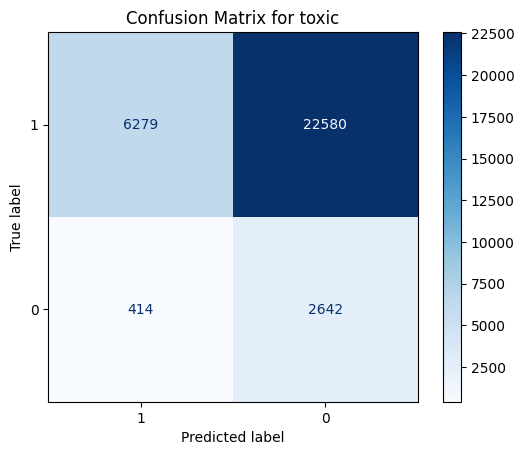

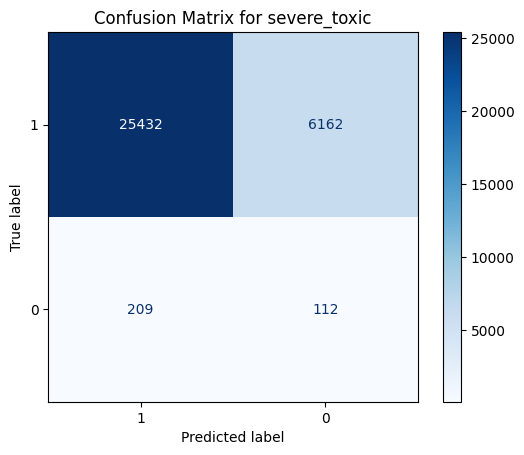

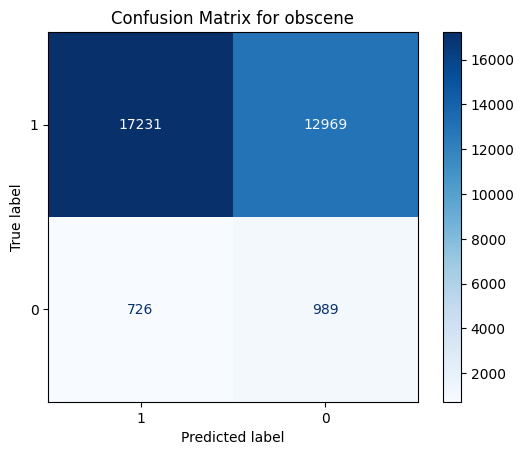

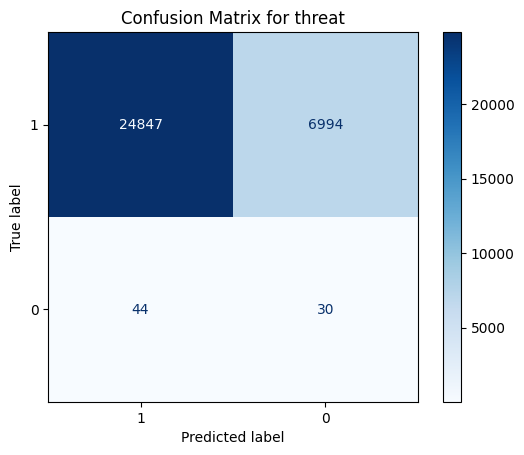

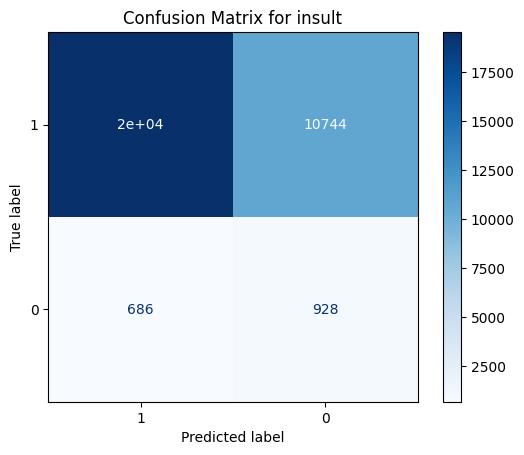

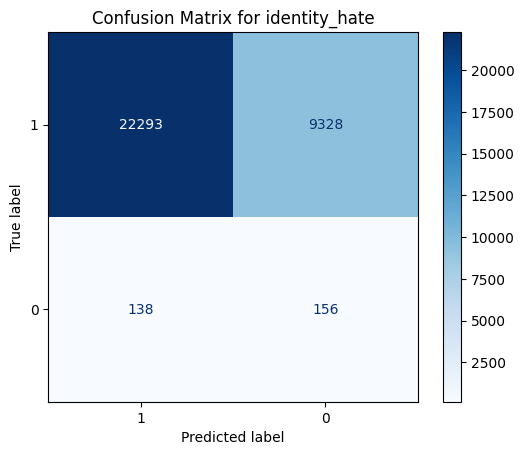

Multi-label Confusion Matrices:
 [[[ 6279 22580]
  [  414  2642]]

 [[25432  6162]
  [  209   112]]

 [[17231 12969]
  [  726   989]]

 [[24847  6994]
  [   44    30]]

 [[19557 10744]
  [  686   928]]

 [[22293  9328]
  [  138   156]]]


In [3]:
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt


test_data_path = 'test.csv'  # true labels
test_my_path = 'joined1.csv'  # predicted labels

test_data = pd.read_csv(test_data_path)
test_my = pd.read_csv(test_my_path)

columns_to_compare = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]


true_labels = test_data[columns_to_compare].fillna(0).astype(int).values
predicted_labels = test_my[columns_to_compare].fillna(0).astype(int).values

ml_cm = multilabel_confusion_matrix(true_labels, predicted_labels)

for idx, column in enumerate(columns_to_compare):
    disp = ConfusionMatrixDisplay(confusion_matrix=ml_cm[idx], display_labels=[1, 0])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {column}")
    plt.show()

print("Multi-label Confusion Matrices:\n", ml_cm)


In [4]:
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=columns_to_compare, zero_division=0)
print(report)

               precision    recall  f1-score   support

        toxic       0.10      0.86      0.19      3056
 severe_toxic       0.02      0.35      0.03       321
      obscene       0.07      0.58      0.13      1715
       threat       0.00      0.41      0.01        74
       insult       0.08      0.57      0.14      1614
identity_hate       0.02      0.53      0.03       294

    micro avg       0.07      0.69      0.12      7074
    macro avg       0.05      0.55      0.09      7074
 weighted avg       0.08      0.69      0.15      7074
  samples avg       0.05      0.07      0.06      7074

